In [2]:
# 初回のみ
cap = None

[1.convert picture]


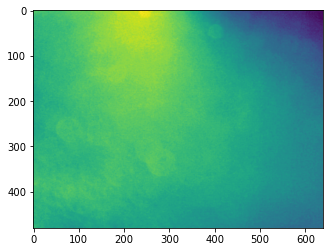

In [5]:
"""
Webカメラで画像を撮影する。
初回のみ初期処理に時間がかかる。（要調査？)
"""
from common.Cammera import *

# 画像の撮影と変換まで
# 2回目以降はこの部分だけ実行すればOK。
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from network.SimpleConvNet import SimpleConvNet
from common.PictureConverter import *
import cv2 as cv


# カメラの初期処理。非常に時間がかかる。
if cap is None:
    cap = setup()

# 黒背景に白文字でないとうまく判断できない為、撮影した画像を変換する。
print("[1.convert picture]")
# Webカメラで手書き文字を撮影
ret, frame = cap.read()
capture(image_name, frame)

# 画像変換(#1～#4)
PictureConvert()


[2.read parameter]
[3.predict]
======= misclassified result =======
{view index: (label, inference), ...}
result: 3
[[ -293.50967961 -2243.22753636  -840.63310157  2628.4502777
  -8985.35335079  -808.54065927 -1967.25159998 -4835.37279519
  -2886.4141855    145.1292096 ]]
[4.process end]


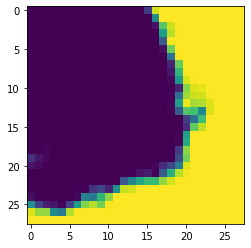

In [6]:
"""
画像を読み込み、数字を予測する。
ペイントの画像を予測したい場合は↓の名前を合わせる。
"""
# 画像読み込み
img = Image.open("mnist_data\\Number_wb.jpg").convert('L')
plt.imshow(img)

# 画像を28*28に変換
img.thumbnail((28, 28)) 
plt.imshow(img)

# numpy arrayに変換
img_array = np.array(img).reshape(1,28,28) 


# ネットワーク宣言
print("\n[2.read parameter]")
network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# パラメタ選択
#network.load_params("parameter\\train10000_test2000_epoch20.pkl")  # 6って答えてしまう(4とは全く思ってない)
#network.load_params("parameter\\train5000_test1000_epoch20.pkl")   # 6って答えてしまう(2か4かもしれんとは言ってる)
#network.load_params("parameter\\train60000_test10000_epoch10.pkl") # 6って答えてしまう(4かもしれんとは言ってる)
network.load_params("parameter\\train60000_test10000_epoch20.pkl") # 4って答えられる(6かもしれんとは言ってる)

# 予測開始
print("[3.predict]")
pred = network.predict(img_array[np.newaxis])

# 結果出力
print("======= misclassified result =======")
print("{view index: (label, inference), ...}")

print("result:", np.argmax(pred))
print(pred)

print("[4.process end]")